The Grover’s search algorithm searches the target value from a set by calculating the mean amplitude and the Grover’s amplitude. The plot of the graph is calculated from the amplitudes derived from the Grover’s algorithm. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
import hashlib
from math import sqrt, pi
from collections import OrderedDict
from statistics import mean
  
def ShowGraph(amplitude_value, n):
    y = np.arange(n)
    plt.bar(y, amplitude_value.values(), align='center', color='b')
    plt.xticks(y, amplitude_value.keys())
    plt.ylabel('Amplitude Value')
    plt.title('Grovers Algorithm')
    plt.show()
    

 GetOracle method takes the xvalue and returns the hex digest of the x value. This method is referred to as the Oracle function.

In [2]:
def GetOracle(x):
    return hashlib.sha256(bytes(x, 'utf-8')).hexdigest()


Execute Grover’s algorithm takes input target, objects, nvalue and rounds.  The amplitude is retrieved based on the 1/ square root of the nvalue.

In [3]:
def ExecuteGrover(target, objects, nvalue, rounds):
    y_pos = np.arange(nvalue)
    amplitude = OrderedDict.fromkeys(objects, 1/sqrt(nvalue))
  
    for i in range(0, rounds, 2):
        for k, v in amplitude.items():
            if GetOracle(k) == target:
                amplitude[k] = v * -1
  
        average = mean(amplitude.values())
        for k, v in amplitude.items():
            if GetOracle(k) == target:
                amplitude[k] = (2 * average) + abs(v)
                continue
            amplitude[k] = v-(2*(v-average))
    return amplitude

The target of the algorithm is to search for '23' in the set of objects {'78','4', '5', '35', '7','9','11','97','23','45','76'}.  The amplitude is searched from the dictionary based on the value 1/ square root of the length of the set (11).

In [4]:
target_algorithm = '23'
objects_grover = ('78','4', '5', '35', '7','9','11','97','23','45','76')
number = len(objects_grover)
amplitude_grover = OrderedDict.fromkeys(objects_grover, 1/sqrt(number))


The mean of the amplitudes is calculated and printed.  The Grover amplitude is calculated based on the average amplitude and the Grover’s operator. The Grover’s operator is  defined as (2|xi> <xi| – average_amplitude) * Oracle function

In [5]:
amplitude_grover[target_algorithm] = amplitude_grover[target_algorithm] * -1
print(amplitude_grover)
average_grover = mean(amplitude_grover.values())
print("Mean is {}".format(average_grover))
for k, v in amplitude_grover.items():
    if k == target_algorithm:
        amplitude_grover[k] = (2 * average_grover) + abs(v)
        continue
    amplitude_grover[k] = v-(2*(v-average_grover))
print(amplitude_grover)

OrderedDict([('78', 0.30151134457776363), ('4', 0.30151134457776363), ('5', 0.30151134457776363), ('35', 0.30151134457776363), ('7', 0.30151134457776363), ('9', 0.30151134457776363), ('11', 0.30151134457776363), ('97', 0.30151134457776363), ('23', -0.30151134457776363), ('45', 0.30151134457776363), ('76', 0.30151134457776363)])
Mean is 0.24669110010907933
OrderedDict([('78', 0.19187085564039502), ('4', 0.19187085564039502), ('5', 0.19187085564039502), ('35', 0.19187085564039502), ('7', 0.19187085564039502), ('9', 0.19187085564039502), ('11', 0.19187085564039502), ('97', 0.19187085564039502), ('23', 0.7948935447959222), ('45', 0.19187085564039502), ('76', 0.19187085564039502)])


The amplitudes are plotted after running the Grover’s algorithm. The target value '23' has the highest amplitude 0.79.

number of rounds are 4
The plot shows the target value with the highest amplitude.


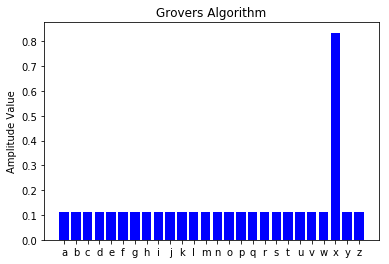

In [6]:
needle_value = "2d711642b726b04401627ca9fbac32f5c8530fb1903cc4db02258717921a4881"
haystack_value = string.ascii_lowercase
num = len(haystack_value)
num_rounds = int((pi / 4) * sqrt(num))
print("number of rounds are {}".format(num_rounds))
print("The plot shows the target value with the highest amplitude.")
ShowGraph(ExecuteGrover(needle_value, haystack_value, num, num_rounds), num)